In [1]:
import cv2
print(cv2.__version__)

4.2.0


## open and save image

In [2]:
# Load an color image in grayscale
cv2.namedWindow('image', cv2.WINDOW_GUI_EXPANDED)
img = cv2.imread('data/dog.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.imwrite('dog2.jpg',img)

True

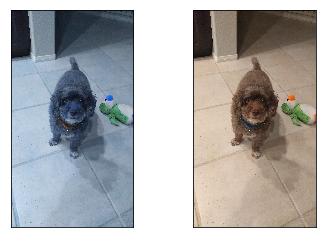

In [3]:
#display image with matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('data/dog.jpg',1)
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122);plt.imshow(img2) # expect true color
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## working with video

In [10]:
#capture from camera
import cv2
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to other color

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [34]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR2')]
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12']


In [12]:
# play a video clip
cap = cv2.VideoCapture('360p.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
# save a video
# capture from a Camera, flip every frame in vertical direction and saves it
import cv2
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('test.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## drawing function

In [4]:
# cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText()

# Create a black image
import numpy as np

img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

#draw rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

#draw circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# draw ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

#draw polygon
pts = np.array([[10,5],[60,20],[200,80],[100,200]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255),4)

# add text
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),6,cv2.LINE_AA)

#Display image in BGR and RGB color (right one)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


'\nb,g,r = cv2.split(img)\nimg2 = cv2.merge([r,g,b])\nplt.subplot(121);plt.imshow(img) # expects distorted color\nplt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis\nplt.subplot(122);plt.imshow(img2) # expect true color\nplt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis\nplt.show()\n'

## mouse draw

In [31]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [32]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [33]:
# another advanced mouse draw
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

## Trackbar as the Color Palette

In [34]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

## Basic Operations on Images

In [5]:
#read pixel value
img = cv2.imread('data/dog.jpg',1)
px = img[100,100]
print(px)

#modify pixel value
img[100,100] = [255,255,255]


[29 25 36]


In [9]:
# accessing RED value
img.item(100,100,2)

#image property
print(img.shape)
print(img.dtype)

(3264, 1836, 3)
uint8


In [ ]:
# image ROI
b1 = img[280:340, 330:390]
img[273:333, 100:160] = b1  #copy region of the image


In [ ]:
# split and merge channel
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [ ]:
# padding boarder
cv2.copyMakeBorder()


## arithmatic operation on images

In [ ]:
# add, blend
img2 = cv2.imread('opencv_logo.jpg')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Bitwise Operations
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

In [ ]:
img = cv2.imread('gradient.png',0)
_, th1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)


cv2.imshow("Image", img)
cv2.imshow("th1", th1)
cv2.imshow("th2", th2)
cv2.imshow("th3", th3)
cv2.imshow("th4", th4)
cv2.imshow("th5", th5)

cv2.waitKey(5000)
cv2.destroyAllWindows()

In [1]:
# Import everything needed to edit video clips
from moviepy.editor import *

# Load myHolidays.mp4 and select the subclip 00:00:50 - 00:00:60
clip = VideoFileClip("360p.mp4").subclip(50,60)


ModuleNotFoundError: No module named 'moviepy'

In [ ]:
# Reduce the audio volume (volume x 0.8)
#clip = clip.volumex(0.8)

# Generate a text clip. You can customize the font, color, etc.
txt_clip = TextClip("My Holidays 2013",fontsize=70,color='white')

# Say that you want it to appear 10s at the center of the screen
txt_clip = txt_clip.set_pos('center').set_duration(10)



In [ ]:
# Overlay the text clip on the first video clip
video = CompositeVideoClip([clip, txt_clip])

# Write the result to a file (many options available !)
video.write_videofile("myHolidays_edited.webm")